# ACF and Smothing 

## Example from class

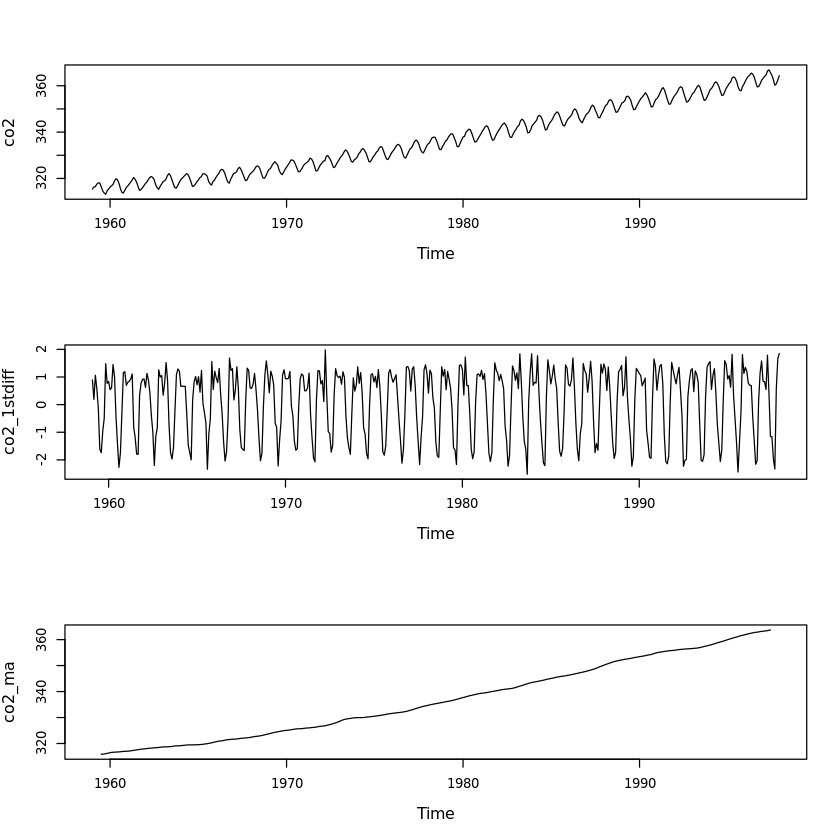

In [1]:
# Load the CO2 dataset in R
data(co2) 

# Take first differences to remove the trend 
co2_1stdiff=diff(co2,differences=1)

# Filter via moving averages to remove the seasonality 
co2_ma=filter(co2,filter=c(1/24,rep(1/12,11),1/24),sides=2)

par(mfrow=c(3,1), cex.lab=1.2,cex.main=1.2)
plot(co2) # plot the original data 
plot(co2_1stdiff) # plot the first differences (removes trend, highlights seasonality)
plot(co2_ma) # plot the filtered series via moving averages (removes the seasonality, highlights the trend)

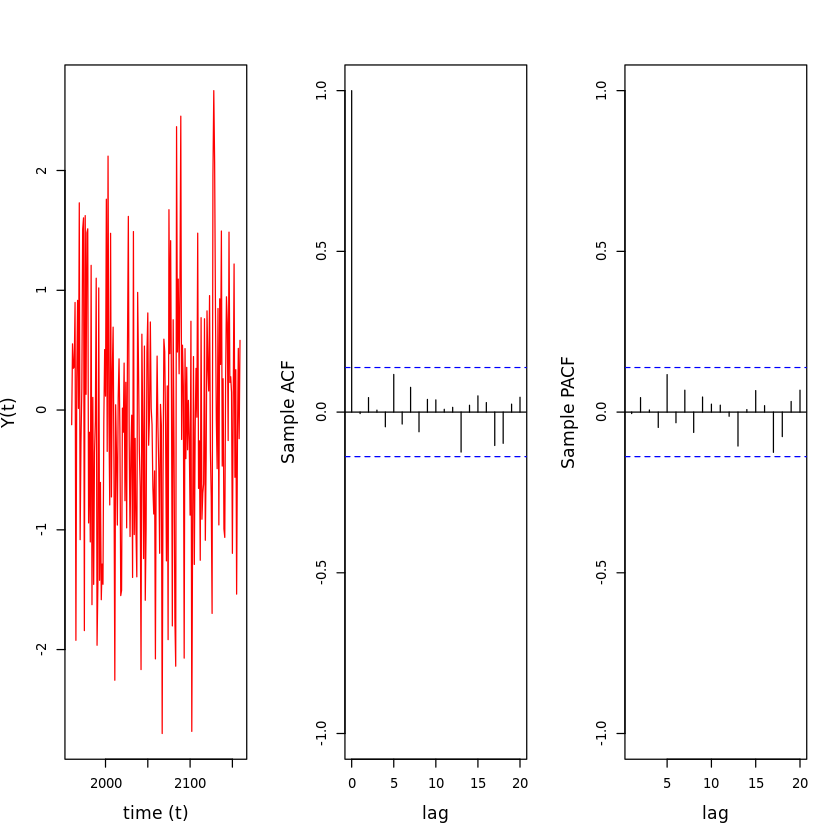

In [2]:
#
# Simulate data with no temporal structure (white noise)
#
set.seed(2021)
T=200
t =1:T
y_white_noise=rnorm(T, mean=0, sd=1)
#
# Define a time series object in R: 
# Assume the data correspond to annual observations starting in January 1960 
#
yt=ts(y_white_noise, start=c(1960), frequency=1)
#
# plot the simulated time series, their sample ACF and their sample PACF
#
par(mfrow = c(1, 3), cex.lab = 1.3, cex.main = 1.3)
yt=ts(y_white_noise, start=c(1960), frequency=1)
plot(yt, type = 'l', col='red', xlab = 'time (t)', ylab = "Y(t)")
acf(yt, lag.max = 20, xlab = "lag",
    ylab = "Sample ACF",ylim=c(-1,1),main="")
pacf(yt, lag.max = 20,xlab = "lag",
     ylab = "Sample PACF",ylim=c(-1,1),main="")

## Example from Heyjobs

### Reading data and Plotting Trend

In [3]:
df <- read.csv(file = 'forecasting_crm.csv')
head(df)

,date_dt,overall_application
,<chr>,<int>
1,2021-01-01,9619
2,2021-02-01,6601
3,2021-03-01,7637
4,2021-04-01,4954
5,2021-05-01,6782
6,2021-06-01,4456


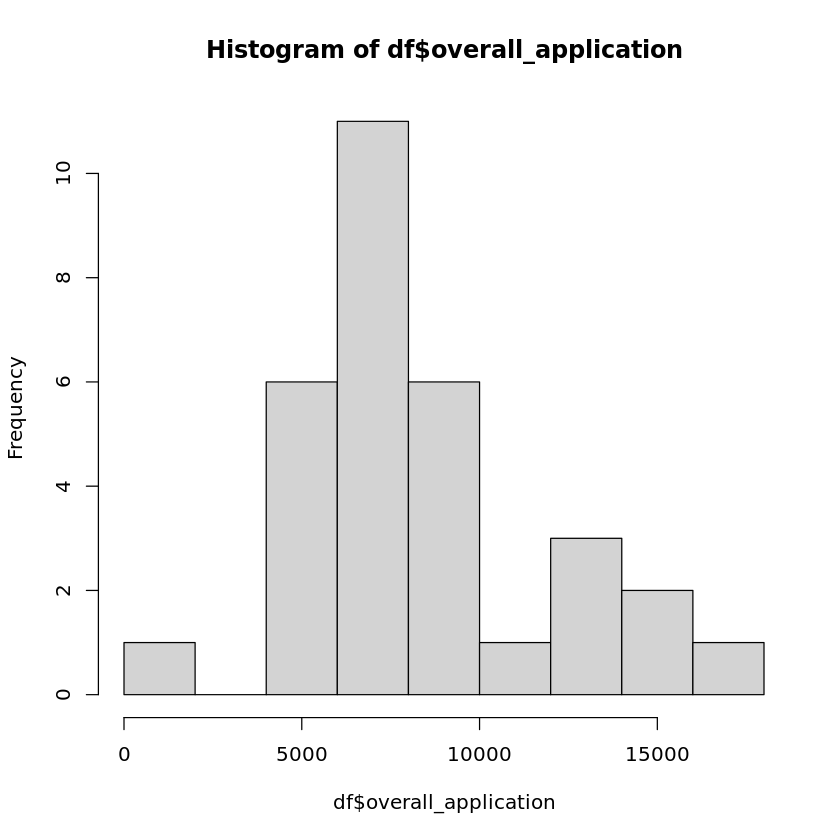

In [4]:
hist(df$overall_application)

In [5]:
install.packages("ggplot2")

Updating HTML index of packages in '.Library'

Making 'packages.html' ...
 done



In [14]:
sum(is.na(df$date_dt))


[1] 0

In [13]:
unique(df$date_dt)


[1] "2021-01-01" "2021-02-01" "2021-03-01" "2021-04-01" "2021-05-01"
 [6] "2021-06-01" "2021-07-01" "2021-08-01" "2021-09-01" "2021-10-01"
[11] "2021-11-01" "2021-12-01" "2022-01-01" "2022-02-01" "2022-03-01"
[16] "2022-04-01" "2022-05-01" "2022-06-01" "2022-07-01" "2022-08-01"
[21] "2022-09-01" "2022-10-01" "2022-11-01" "2022-12-01" "2023-01-01"
[26] "2023-02-01" "2023-03-01" "2023-04-01" "2023-05-01" "2023-06-01"
[31] "2023-07-01"

In [11]:
df$overall_application[is.na(df$overall_application)] <- 0


In [15]:
df$date_dt <- as.Date(df$date_dt)


In [17]:
df <- df[df$date_dt != as.Date("2023-07-01"), ]


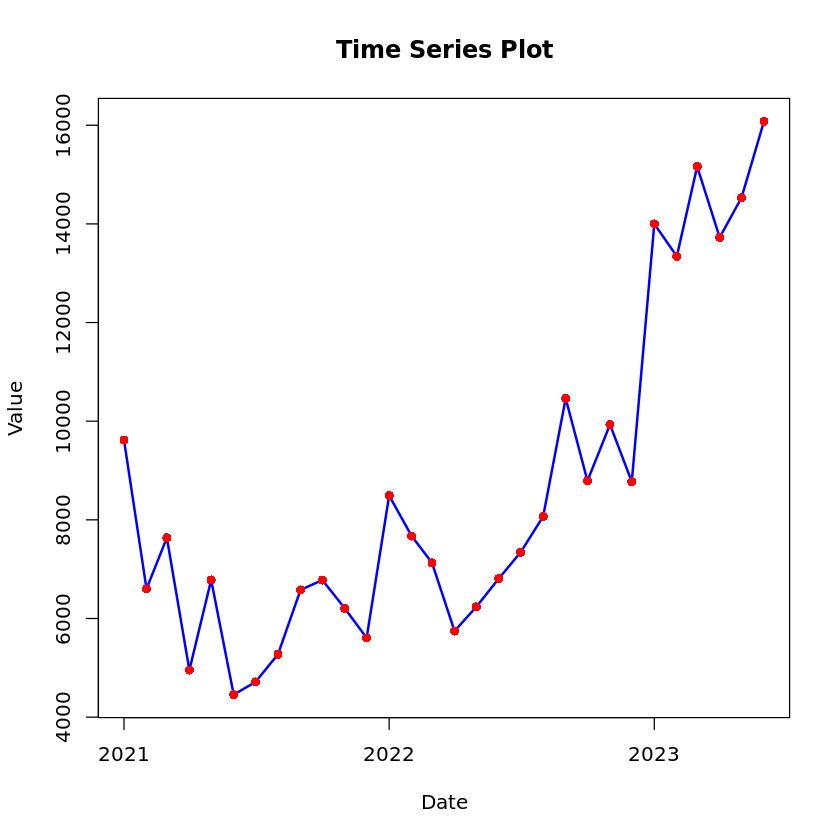

In [18]:
# Plotting the time series using base R functions
plot(df$date_dt, df$overall_application, type="l", 
     main="Time Series Plot", 
     xlab="Date", 
     ylab="Value", 
     col="blue", 
     lwd=2)

# Adding points for each data point
points(df$date_dt, df$overall_application, pch=16, col="red")

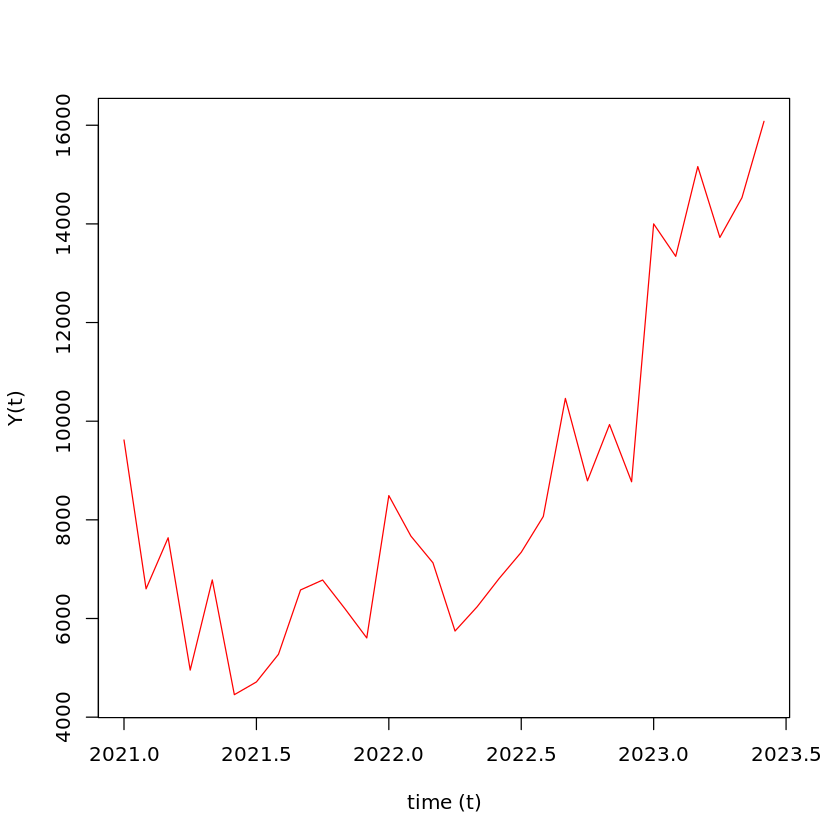

In [45]:
yt=ts(df$overall_application, start=c(2021), frequency=12)
# par(mfrow = c(1, 3), cex.lab = 1.3, cex.main = 1.3)
plot(yt, type = 'l', col='red', xlab = 'time (t)', ylab = "Y(t)")

### ACF Function

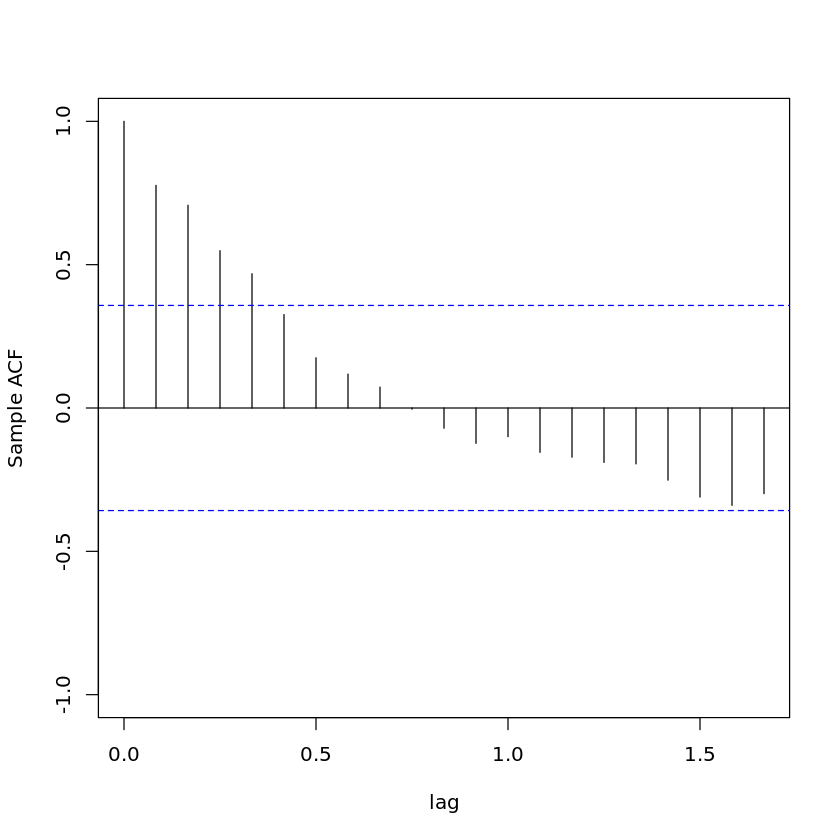

In [24]:
acf(yt, lag.max = 20, xlab = "lag",
    ylab = "Sample ACF",ylim=c(-1,1),main="")

### Smothing Processes

In [46]:
# Take first differences to remove the trend 
dfstdiff=diff(yt,differences=1)

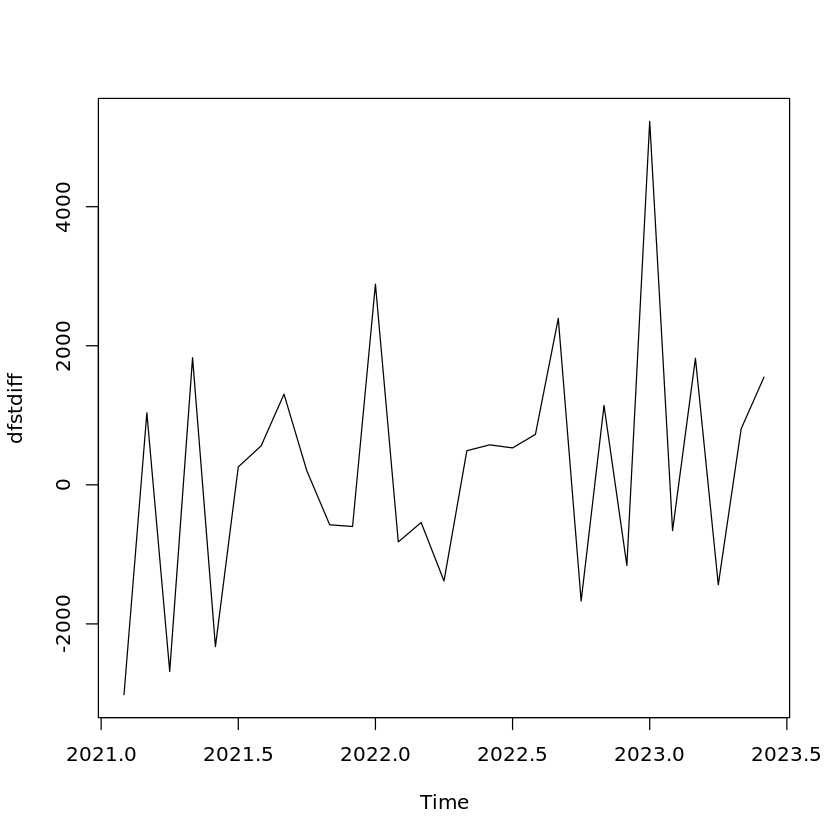

In [47]:
plot(dfstdiff) # plot the first differences (removes trend, highlights seasonality)


In [51]:
number_of_rows <- nrow(df)
print(number_of_rows)

[1] 30


In [52]:
yt

,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
2021,9619,6601,7637,4954,6782,4456,4714,5275,6579,6780,6205,5606
2022,8492,7671,7129,5746,6237,6812,7343,8069,10462,8791,9932,8772
2023,14000,13342,15162,13725,14530,16079,,,,,,


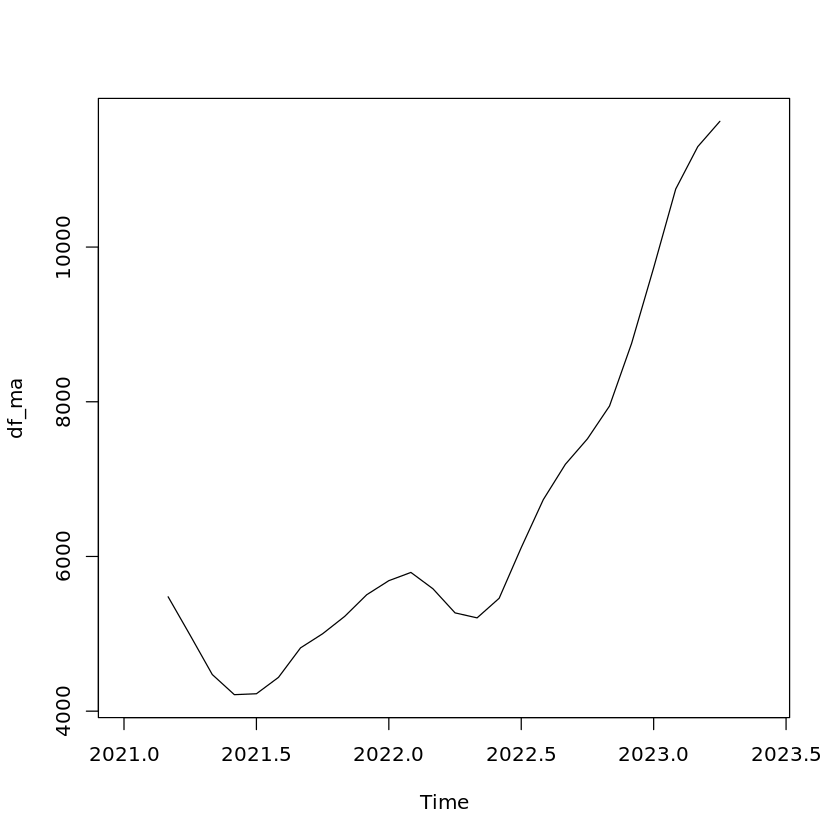

In [54]:
# Filter via moving averages to remove the seasonality 
df_ma=filter(yt,filter=c(1/10, 2/10, 2/10, 2/10, 1/10),sides=2)

# par(mfrow=c(3,1), cex.lab=1.2,cex.main=1.2)

plot(df_ma) # plot the filtered series via moving averages (removes the seasonality, highlights the trend)

### Running ACF on Smothed Series

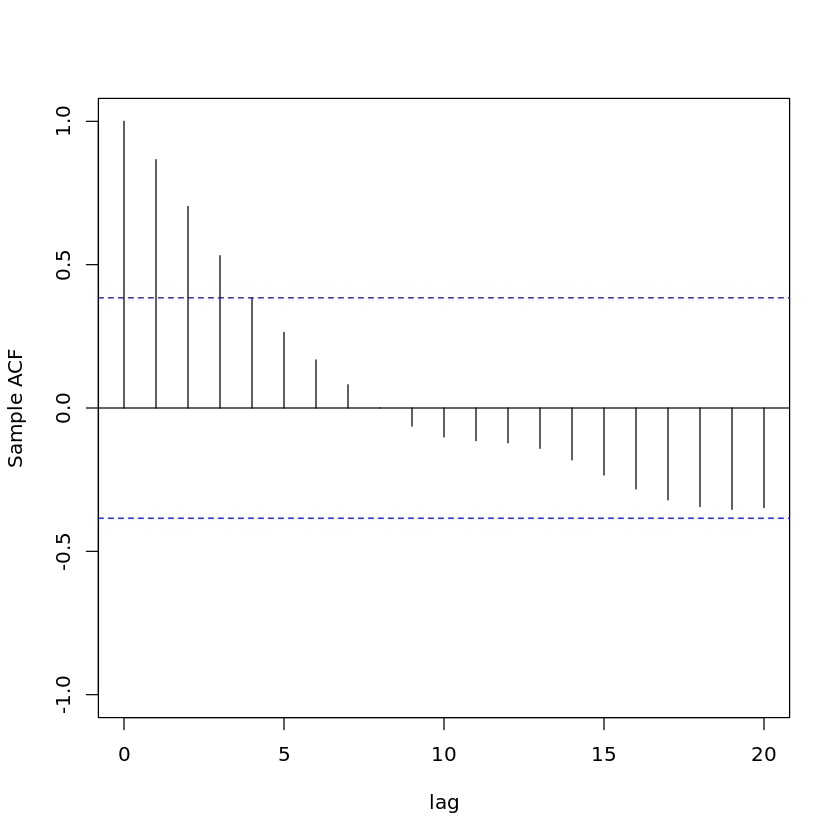

In [56]:
acf(df_ma[!is.na(df_ma)], lag.max = 20, xlab = "lag",
    ylab = "Sample ACF",ylim=c(-1,1),main="")

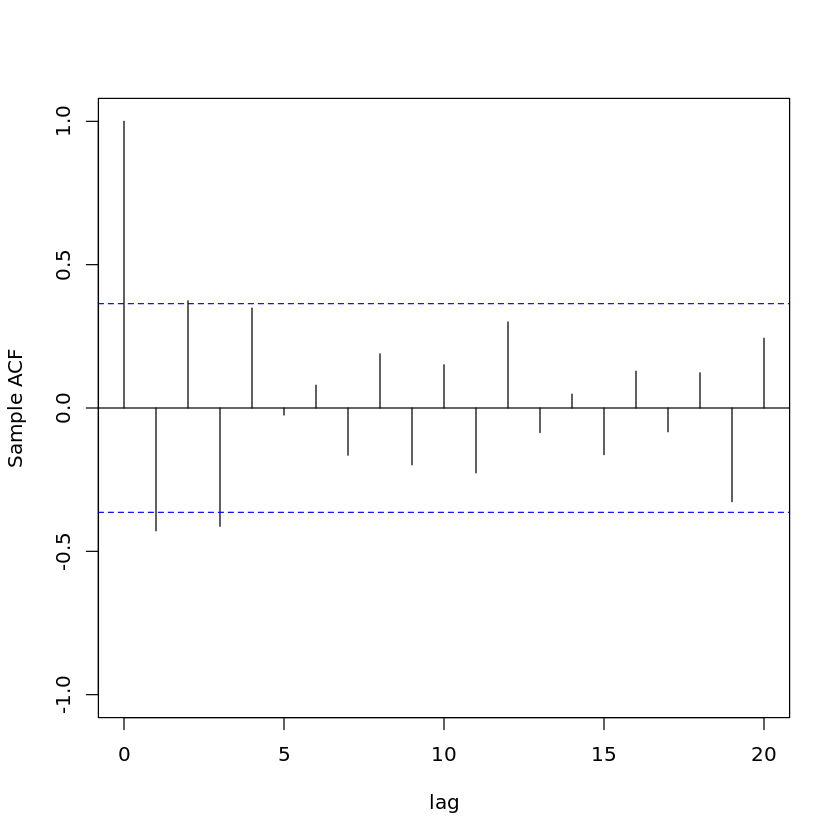

In [57]:
acf(dfstdiff[!is.na(dfstdiff)], lag.max = 20, xlab = "lag",
    ylab = "Sample ACF",ylim=c(-1,1),main="")